# 1. 데이터 읽기

In [ ]:
import pandas as pd
import numpy as np

* 기존의 배달데이터는 배달건수가 0건인 데이터는 존재하지 않았다. 즉 빠진 날자와 시간대가 존재했다. 날시데이터는 빠진 날짜오 시간대가 없이 모두 존재하므로 시간대별 계산을 편리하기 히기 위해 배달데이터도 빠진 날짜와 시간대가 없도록 복원한 것을 사용하였다.

In [ ]:
rainSnow=  pd.read_csv('/content/drive/MyDrive/시군구_시간대별_최빈강수형태.csv', parse_dates=['날짜'])
rain = pd.read_csv('/content/drive/MyDrive/시군구_시간대별_중간강수.csv', parse_dates=['날짜'])
temp = pd.read_csv('/content/drive/MyDrive/시군구_시간대별_중간기온.csv', parse_dates=['날짜'])
df = pd.read_csv('/content/drive/MyDrive/entire_datetime_3.csv',parse_dates=['date'])

In [ ]:
rainSnow['강수형태'].unique()

array(['없음', nan, '비', '비/눈', '눈', '소나기'], dtype=object)

In [ ]:
rain

,광역시도,시군구,날짜,시간대,강수
0,강원도,강릉시,2019-08-01,0,0.000
1,강원도,강릉시,2019-08-01,1,0.000
2,강원도,강릉시,2019-08-01,2,0.000
3,강원도,강릉시,2019-08-01,3,0.000
4,강원도,강릉시,2019-08-01,4,0.000
...,...,...,...,...,...
4626859,충청북도,충주시,2021-08-31,19,13.100
4626860,충청북도,충주시,2021-08-31,20,21.000
4626861,충청북도,충주시,2021-08-31,21,11.300
4626862,충청북도,충주시,2021-08-31,22,15.950


In [ ]:
rainSnow

,광역시도,시군구,날짜,시간대,강수형태
0,강원도,강릉시,2019-08-01,0,없음
1,강원도,강릉시,2019-08-01,1,없음
2,강원도,강릉시,2019-08-01,2,없음
3,강원도,강릉시,2019-08-01,3,없음
4,강원도,강릉시,2019-08-01,4,없음
...,...,...,...,...,...
4626859,충청북도,충주시,2021-08-31,19,비
4626860,충청북도,충주시,2021-08-31,20,비
4626861,충청북도,충주시,2021-08-31,21,비
4626862,충청북도,충주시,2021-08-31,22,비


결측치를 제거해서 temp가 숫자가 더 적다. join할때 nan으로 채워진다.

In [ ]:
temp

,광역시도,시군구,날짜,시간대,기온
0,강원도,강릉시,2019-08-01,0,30.450000
1,강원도,강릉시,2019-08-01,1,31.570832
2,강원도,강릉시,2019-08-01,2,31.791665
3,강원도,강릉시,2019-08-01,3,32.838888
4,강원도,강릉시,2019-08-01,4,32.970832
...,...,...,...,...,...
4623038,충청북도,충주시,2021-08-31,19,20.251667
4623039,충청북도,충주시,2021-08-31,20,19.736667
4623040,충청북도,충주시,2021-08-31,21,19.431666
4623041,충청북도,충주시,2021-08-31,22,19.430000


In [ ]:
df

,Unnamed: 0,배달건수,date,time,광역시도,시군구,읍면동
0,0,0.0,2019-08-01,00:00:00,충청북도,충주시,칠금동
1,1,0.0,2019-08-01,01:00:00,충청북도,충주시,칠금동
2,2,0.0,2019-08-01,02:00:00,충청북도,충주시,칠금동
3,3,0.0,2019-08-01,03:00:00,충청북도,충주시,칠금동
4,4,0.0,2019-08-01,04:00:00,충청북도,충주시,칠금동
...,...,...,...,...,...,...,...
16697852,18284,0.0,2021-08-31,19:00:00,대전광역시,대덕구,오정동
16697853,18285,0.0,2021-08-31,21:00:00,대전광역시,대덕구,오정동
16697854,18286,0.0,2021-08-31,22:00:00,대전광역시,대덕구,오정동
16697855,18287,0.0,2021-08-31,23:00:00,대전광역시,대덕구,오정동


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16697857 entries, 0 to 16697856
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Unnamed: 0  int64         
 1   배달건수        float64       
 2   date        datetime64[ns]
 3   time        object        
 4   광역시도        object        
 5   시군구         object        
 6   읍면동         object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 891.8+ MB


## 1.1 데이터 정제

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,배달건수,date,time,광역시도,시군구,읍면동
0,0.0,2019-08-01,00:00:00,충청북도,충주시,칠금동
1,0.0,2019-08-01,01:00:00,충청북도,충주시,칠금동
2,0.0,2019-08-01,02:00:00,충청북도,충주시,칠금동
3,0.0,2019-08-01,03:00:00,충청북도,충주시,칠금동
4,0.0,2019-08-01,04:00:00,충청북도,충주시,칠금동
...,...,...,...,...,...,...
16697852,0.0,2021-08-31,19:00:00,대전광역시,대덕구,오정동
16697853,0.0,2021-08-31,21:00:00,대전광역시,대덕구,오정동
16697854,0.0,2021-08-31,22:00:00,대전광역시,대덕구,오정동
16697855,0.0,2021-08-31,23:00:00,대전광역시,대덕구,오정동


In [ ]:
df.rename(columns=	{'date':'날짜',	'time':'시간대'}, inplace=True)
df=df[['광역시도','시군구',	'읍면동','날짜','시간대','배달건수']]
df['시간대'] = df['시간대'].apply(lambda x: x[:2])
df = df.astype({'배달건수':'int','시간대':'int'})
df

,광역시도,시군구,읍면동,날짜,시간대,배달건수
0,충청북도,충주시,칠금동,2019-08-01,0,0
1,충청북도,충주시,칠금동,2019-08-01,1,0
2,충청북도,충주시,칠금동,2019-08-01,2,0
3,충청북도,충주시,칠금동,2019-08-01,3,0
4,충청북도,충주시,칠금동,2019-08-01,4,0
...,...,...,...,...,...,...
16697852,대전광역시,대덕구,오정동,2021-08-31,19,0
16697853,대전광역시,대덕구,오정동,2021-08-31,21,0
16697854,대전광역시,대덕구,오정동,2021-08-31,22,0
16697855,대전광역시,대덕구,오정동,2021-08-31,23,0


In [ ]:
df[df['날짜']>'2021-08-31']

,광역시도,시군구,읍면동,날짜,시간대,배달건수
18288,충청북도,충주시,칠금동,2021-09-01,0,0
36577,강원도,속초시,교동,2021-09-01,0,0
54866,경기도,고양시 일산동구,마두동,2021-09-01,0,0
73155,경기도,고양시 일산동구,백석동,2021-09-01,0,0
91444,경기도,고양시 일산동구,식사동,2021-09-01,0,0
...,...,...,...,...,...,...
16624700,강원도,춘천시,퇴계동,2021-09-01,0,0
16642989,강원도,춘천시,효자동,2021-09-01,0,0
16661278,강원도,춘천시,소양로2가,2021-09-01,0,0
16679567,강원도,춘천시,요선동,2021-09-01,0,0


In [ ]:
df.drop(df[df['날짜']>'2021-08-31'].index,inplace=True)

In [ ]:
df[df['날짜']>'2021-08-31']

,광역시도,시군구,읍면동,날짜,시간대,배달건수


날씨데이터는 시군구의 시간대별로 존재하므로 배달데이터도 시군구별로 하루동안 각 시간대별 총 배달건수를 구했다.

In [ ]:
df = df.groupby(['광역시도','시군구','날짜','시간대'])['배달건수'].sum().reset_index()
df

,광역시도,시군구,날짜,시간대,배달건수
0,강원도,강릉시,2019-08-01,0,0
1,강원도,강릉시,2019-08-01,1,0
2,강원도,강릉시,2019-08-01,2,0
3,강원도,강릉시,2019-08-01,3,0
4,강원도,강릉시,2019-08-01,4,0
...,...,...,...,...,...
2834635,충청북도,충주시,2021-08-31,19,0
2834636,충청북도,충주시,2021-08-31,20,0
2834637,충청북도,충주시,2021-08-31,21,0
2834638,충청북도,충주시,2021-08-31,22,0


In [ ]:
df.isna().sum()

광역시도    0
시군구     0
날짜      0
시간대     0
배달건수    0
dtype: int64

In [ ]:
rainSnow

,광역시도,시군구,날짜,시간대,강수형태
0,강원도,강릉시,2019-08-01,0,없음
1,강원도,강릉시,2019-08-01,1,없음
2,강원도,강릉시,2019-08-01,2,없음
3,강원도,강릉시,2019-08-01,3,없음
4,강원도,강릉시,2019-08-01,4,없음
...,...,...,...,...,...
4626859,충청북도,충주시,2021-08-31,19,비
4626860,충청북도,충주시,2021-08-31,20,비
4626861,충청북도,충주시,2021-08-31,21,비
4626862,충청북도,충주시,2021-08-31,22,비


# 2. 배달데이터와 날씨 데이터 JOIN하기

## 2.1 강수형태

In [ ]:
df_all = pd.merge(left = df, right = rainSnow, on=['광역시도','시군구','날짜','시간대'], how = 'left')
df_all

,광역시도,시군구,날짜,시간대,배달건수,강수형태
0,강원도,강릉시,2019-08-01,0,0,없음
1,강원도,강릉시,2019-08-01,1,0,없음
2,강원도,강릉시,2019-08-01,2,0,없음
3,강원도,강릉시,2019-08-01,3,0,없음
4,강원도,강릉시,2019-08-01,4,0,없음
...,...,...,...,...,...,...
2834635,충청북도,충주시,2021-08-31,19,0,비
2834636,충청북도,충주시,2021-08-31,20,0,비
2834637,충청북도,충주시,2021-08-31,21,0,비
2834638,충청북도,충주시,2021-08-31,22,0,비


In [ ]:
df_all['강수형태'].unique()

array(['없음', nan, '비', '비/눈', '눈', '소나기'], dtype=object)

## 2.2 강수

In [ ]:
df_all =  pd.merge(left = df_all, right = rain, on=['광역시도','시군구','날짜','시간대'], how = 'left')
df_all

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수
0,강원도,강릉시,2019-08-01,0,0,없음,0.000
1,강원도,강릉시,2019-08-01,1,0,없음,0.000
2,강원도,강릉시,2019-08-01,2,0,없음,0.000
3,강원도,강릉시,2019-08-01,3,0,없음,0.000
4,강원도,강릉시,2019-08-01,4,0,없음,0.000
...,...,...,...,...,...,...,...
2834635,충청북도,충주시,2021-08-31,19,0,비,13.100
2834636,충청북도,충주시,2021-08-31,20,0,비,21.000
2834637,충청북도,충주시,2021-08-31,21,0,비,11.300
2834638,충청북도,충주시,2021-08-31,22,0,비,15.950


In [ ]:
df_all.describe()

,시간대,배달건수,강수
count,2.834640e+06,2.834640e+06,2.832186e+06
mean,1.150000e+01,8.887684e+00,1.670585e-01
std,6.922188e+00,3.797238e+01,1.215197e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.750000e+00,0.000000e+00,0.000000e+00
50%,1.150000e+01,0.000000e+00,0.000000e+00
75%,1.725000e+01,1.000000e+00,0.000000e+00
max,2.300000e+01,1.752000e+03,8.950000e+01


In [ ]:
df_all.isna().sum()

광역시도       0
시군구        0
날짜         0
시간대        0
배달건수       0
강수형태    3542
강수      2454
dtype: int64

In [ ]:
df_all[df_all['강수'].isna()]

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수
41,강원도,강릉시,2019-08-02,17,0,NaN,NaN
191,강원도,강릉시,2019-08-08,23,0,NaN,NaN
5642,강원도,강릉시,2020-03-23,2,0,NaN,NaN
6119,강원도,강릉시,2020-04-11,23,0,NaN,NaN
6944,강원도,강릉시,2020-05-16,8,0,NaN,NaN
...,...,...,...,...,...,...,...
2832424,충청북도,충주시,2021-05-31,16,0,NaN,NaN
2832485,충청북도,충주시,2021-06-03,5,0,NaN,NaN
2832870,충청북도,충주시,2021-06-19,6,0,NaN,NaN
2833422,충청북도,충주시,2021-07-12,6,0,NaN,NaN


강수가 NaN인 것의 개수가 2454개 이므로, 강수형태가 NaN인것 중에 강수가 NaN이 아닌 것은 존재하지만 반대로 강수가 NaN인 것은 존재하지 않는다. </br>
**=> 강수가 NaN이면 강수형태가 NaN**


In [ ]:
df_all[(df_all['강수'].isna()) & (df_all['강수형태'].isna())]

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수
41,강원도,강릉시,2019-08-02,17,0,NaN,NaN
191,강원도,강릉시,2019-08-08,23,0,NaN,NaN
5642,강원도,강릉시,2020-03-23,2,0,NaN,NaN
6119,강원도,강릉시,2020-04-11,23,0,NaN,NaN
6944,강원도,강릉시,2020-05-16,8,0,NaN,NaN
...,...,...,...,...,...,...,...
2832424,충청북도,충주시,2021-05-31,16,0,NaN,NaN
2832485,충청북도,충주시,2021-06-03,5,0,NaN,NaN
2832870,충청북도,충주시,2021-06-19,6,0,NaN,NaN
2833422,충청북도,충주시,2021-07-12,6,0,NaN,NaN


## 2.3 기온 

In [ ]:
df_all =  pd.merge(left = df_all, right = temp, on=['광역시도','시군구','날짜','시간대'], how = 'left')
df_all

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
0,강원도,강릉시,2019-08-01,0,0,없음,0.000,30.900000
1,강원도,강릉시,2019-08-01,1,0,없음,0.000,32.099998
2,강원도,강릉시,2019-08-01,2,0,없음,0.000,32.099998
3,강원도,강릉시,2019-08-01,3,0,없음,0.000,34.099998
4,강원도,강릉시,2019-08-01,4,0,없음,0.000,34.099998
...,...,...,...,...,...,...,...,...
2834635,충청북도,충주시,2021-08-31,19,0,비,13.100,20.400000
2834636,충청북도,충주시,2021-08-31,20,0,비,21.000,19.875000
2834637,충청북도,충주시,2021-08-31,21,0,비,11.300,19.724999
2834638,충청북도,충주시,2021-08-31,22,0,비,15.950,19.749999


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2834640 entries, 0 to 2834639
Data columns (total 8 columns):
 #   Column  Dtype         
---  ------  -----         
 0   광역시도    object        
 1   시군구     object        
 2   날짜      datetime64[ns]
 3   시간대     int64         
 4   배달건수    int64         
 5   강수형태    object        
 6   강수      float64       
 7   기온      float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 194.6+ MB


In [ ]:
df_all.isna().sum()

광역시도       0
시군구        0
날짜         0
시간대        0
배달건수       0
강수형태    3542
강수      2454
기온      2438
dtype: int64

In [ ]:
df_all[df_all['기온'].isna()]

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
41,강원도,강릉시,2019-08-02,17,0,NaN,NaN,NaN
191,강원도,강릉시,2019-08-08,23,0,NaN,NaN,NaN
5642,강원도,강릉시,2020-03-23,2,0,NaN,NaN,NaN
6119,강원도,강릉시,2020-04-11,23,0,NaN,NaN,NaN
6944,강원도,강릉시,2020-05-16,8,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2832424,충청북도,충주시,2021-05-31,16,0,NaN,NaN,NaN
2832485,충청북도,충주시,2021-06-03,5,0,NaN,NaN,NaN
2832870,충청북도,충주시,2021-06-19,6,0,NaN,NaN,NaN
2833422,충청북도,충주시,2021-07-12,6,0,NaN,NaN,NaN


또한 기온이 NaN인 모든 값은 강수와 강수형태가 NaN이다.
**=> 기온이 NaN이면 강수가 NaN -> 강수형태도 NaN**

In [ ]:
df_all[(df_all['기온'].isna()) & (df_all['강수'].isna()) ]

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
41,강원도,강릉시,2019-08-02,17,0,NaN,NaN,NaN
191,강원도,강릉시,2019-08-08,23,0,NaN,NaN,NaN
5642,강원도,강릉시,2020-03-23,2,0,NaN,NaN,NaN
6119,강원도,강릉시,2020-04-11,23,0,NaN,NaN,NaN
6944,강원도,강릉시,2020-05-16,8,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2832424,충청북도,충주시,2021-05-31,16,0,NaN,NaN,NaN
2832485,충청북도,충주시,2021-06-03,5,0,NaN,NaN,NaN
2832870,충청북도,충주시,2021-06-19,6,0,NaN,NaN,NaN
2833422,충청북도,충주시,2021-07-12,6,0,NaN,NaN,NaN


# 3. 날씨 오류 수정하기

## 3.1 데이터 정제하기

In [ ]:
df_final = df_all.copy()

* 강수가 NaN인 것의 개수가 2454개 이므로, 강수형태가 NaN인것 중에 강수가 NaN이 아닌 것은 존재하지만 반대로 강수가 NaN인 것은 존재하지 않는다. </br>

  **=> 강수가 NaN이면 강수형태가 NaN**

* 또한 기온이 NaN인 모든 값은 강수와 강수형태가 NaN이다.

  **=> 기온이 NaN이면 강수가 NaN -> 강수형태도 NaN**

위의 두 사례에 해당하지 않는 것은 1000여개 뿐이므로 강수형태가 NaN이면 강수와 기온을 모두 NaN으로 바꾼다.

In [ ]:
df_final.isna().sum()

광역시도       0
시군구        0
날짜         0
시간대        0
배달건수       0
강수형태    3542
강수      2454
기온      2438
dtype: int64

In [ ]:
df_final['강수'] = np.where(df_final['강수형태'].isna(), np.nan, df_final['강수'])
df_final['기온'] = np.where(df_final['강수형태'].isna(), np.nan, df_final['기온'])

In [ ]:
df_final.isna().sum()

광역시도       0
시군구        0
날짜         0
시간대        0
배달건수       0
강수형태    3542
강수      3542
기온      3542
dtype: int64

## 3.2 강수형태 '없음'인데 강수가 0이 아닌 경우(65774개)

날씨데이너는 전체로 묶어 정제하기에는 너무 커서 데이터프레임을 **반**씩 나누어 진행하였다. 또한 읍면동의 이름체계가 배달데이터와 너무 달라 사용할 수 없던 관계로 시군구,날짜별,시간대별로 묶는 후, 계산하여 사용하였다. 강수형태는 `NaN(missing),없음, 비, 비/눈, 눈, 소나기`로 이루어져있다. 강수는 -1이 missing이다. 이렇게 날씨데이터를 정제하는 과정에서 강수형태는 숫자가 아니므로 평균, 최소 등의 계산이 불가능하여 항상 최빈값을 취하였고, 강수는 중간값을 취한 후 두 중간값의 평균을 취하였다. 따라서 강수형태에서는 없음, **즉 눈과 비가 내리지 않았다고 기록되어있어도 강수가 0이 아닌 항목이 존재할 수 있다.** 아래는 이러한 오류를 수정하는 과정이다.

In [ ]:
case1 = df_final[(df_final['강수형태']=='없음') & (df_final['강수'] > 0)]
case1

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온


In [ ]:
case1.describe()

,시간대,배달건수,강수,기온
count,65774.000000,65774.000000,65774.000000,65774.000000
mean,11.567945,8.373978,0.948140,18.888083
std,6.945380,36.139240,1.826142,6.907009
min,0.000000,0.000000,0.025000,-13.950000
25%,6.000000,0.000000,0.250000,15.300000
50%,12.000000,0.000000,0.500000,20.900000
75%,18.000000,0.000000,1.000000,23.900000
max,23.000000,1239.000000,59.000000,33.799999


In [ ]:
case1.sort_values('강수', ascending=False)

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
1664006,부산광역시,북구,2021-08-23,14,0,없음,59.000000,25.900000
2368094,전라남도,나주시,2020-08-07,14,17,없음,46.500000,23.799999
2514966,전라북도,정읍시,2020-08-31,6,0,없음,42.900001,25.599999
2065015,서울특별시,양천구,2021-06-29,7,0,없음,37.500000,23.400000
2185704,울산광역시,북구,2020-08-28,0,0,없음,36.099998,28.350001
...,...,...,...,...,...,...,...,...
2122430,서울특별시,중구,2019-09-12,14,0,없음,0.025000,18.799999
516375,경기도,양주시,2020-01-27,15,8,없음,0.025000,4.475000
1590629,부산광역시,강서구,2021-08-14,5,0,없음,0.025000,24.750000
1590592,부산광역시,강서구,2021-08-12,16,49,없음,0.025000,24.550000


In [ ]:
case1[case1['강수']<=2]

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
139,강원도,강릉시,2019-08-06,19,0,없음,1.500,24.000000
143,강원도,강릉시,2019-08-06,23,0,없음,0.475,25.200001
244,강원도,강릉시,2019-08-11,4,0,없음,0.425,26.200001
250,강원도,강릉시,2019-08-11,10,0,없음,0.400,25.799999
252,강원도,강릉시,2019-08-11,12,3,없음,0.500,25.700001
...,...,...,...,...,...,...,...,...
2834593,충청북도,충주시,2021-08-30,1,0,없음,0.075,22.200001
2834619,충청북도,충주시,2021-08-31,3,0,없음,0.225,23.299999
2834625,충청북도,충주시,2021-08-31,9,0,없음,0.575,20.425000
2834629,충청북도,충주시,2021-08-31,13,0,없음,0.200,21.100000


In [ ]:
case1[case1['강수']<=2]['날짜'].dt.month.unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7])

* 기상청에서는 비가 3mm이하로 올 경우 약한 비라고 말한다. 따라서 평년 첫눈 시기등을 고려하여 눈이 올 확률이 적은 **5~10월**사이에 강수형태에 비가 기록되지 않는 **강수량이 2mm이하인 경우**에는 **강수를 0으로 처리할 것**이다.

In [ ]:
case1[(case1['강수']<=2) & (case1['날짜'].dt.month <= 10) & (case1['날짜'].dt.month >=5)]

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
139,강원도,강릉시,2019-08-06,19,0,없음,1.500,24.000000
143,강원도,강릉시,2019-08-06,23,0,없음,0.475,25.200001
244,강원도,강릉시,2019-08-11,4,0,없음,0.425,26.200001
250,강원도,강릉시,2019-08-11,10,0,없음,0.400,25.799999
252,강원도,강릉시,2019-08-11,12,3,없음,0.500,25.700001
...,...,...,...,...,...,...,...,...
2834593,충청북도,충주시,2021-08-30,1,0,없음,0.075,22.200001
2834619,충청북도,충주시,2021-08-31,3,0,없음,0.225,23.299999
2834625,충청북도,충주시,2021-08-31,9,0,없음,0.575,20.425000
2834629,충청북도,충주시,2021-08-31,13,0,없음,0.200,21.100000


In [ ]:
case1[(case1['강수']<=2) & ((case1['날짜'].dt.month > 10) | (case1['날짜'].dt.month <5)) ].sort_values('강수', ascending=False)

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
1221676,경상북도,칠곡군,2021-04-03,4,0,없음,2.000,15.600000
331794,경기도,성남시 수정구,2019-11-17,18,0,없음,2.000,11.000000
216423,경기도,구리시,2021-04-27,15,0,없음,2.000,13.750000
2169390,세종특별자치시,\N,2020-11-18,6,0,없음,2.000,16.799999
1723757,부산광역시,해운대구,2020-02-12,5,0,없음,2.000,13.700000
...,...,...,...,...,...,...,...,...
524285,경기도,양주시,2020-12-22,5,0,없음,0.025,5.550000
524604,경기도,양주시,2021-01-04,12,14,없음,0.025,-3.250000
817065,경상남도,거제시,2020-12-29,9,0,없음,0.025,8.900000
524606,경기도,양주시,2021-01-04,14,21,없음,0.025,-4.350000


* 아래의 13개는 **강수형태를 눈**으로 수정

In [ ]:
case1[(case1['강수']<=2) & ((case1['날짜'].dt.month > 10) | (case1['날짜'].dt.month <5)) & (case1['기온']<-10)].sort_values('기온')

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
2591225,충청남도,보령시,2021-01-07,17,1,없음,0.100,-13.950
2718670,충청북도,단양군,2020-12-14,22,0,없음,0.125,-13.800
2719220,충청북도,단양군,2021-01-06,20,0,없음,0.125,-13.200
2390056,전라남도,목포시,2021-01-07,16,0,없음,0.100,-11.500
2390058,전라남도,목포시,2021-01-07,18,0,없음,0.200,-11.400
2828946,충청북도,충주시,2021-01-06,18,0,없음,0.100,-11.300
2572919,충청남도,논산시,2021-01-06,23,0,없음,0.500,-10.925
2518057,전라북도,정읍시,2021-01-07,1,0,없음,0.825,-10.550
2518055,전라북도,정읍시,2021-01-06,23,5,없음,1.175,-10.500
2518056,전라북도,정읍시,2021-01-07,0,3,없음,1.025,-10.500


* 아래 4369개는 강수형태가 비라고 판단하여 매우 적은 비이므로 **강수 = 0**으로 한다.

In [ ]:
case1[(case1['강수']<=2) & ((case1['날짜'].dt.month > 10) | (case1['날짜'].dt.month <5)) & (case1['기온']>10)].sort_values('강수', ascending=False)

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
2114513,서울특별시,은평구,2020-11-17,17,33,없음,2.000,15.100000
2684941,충청남도,홍성군,2021-04-12,13,0,없음,2.000,12.600000
1103529,경상북도,봉화군,2020-04-17,9,0,없음,2.000,10.300000
2191600,울산광역시,북구,2021-04-30,16,2,없음,2.000,12.900000
350082,경기도,성남시 중원구,2019-11-17,18,0,없음,2.000,11.000000
...,...,...,...,...,...,...,...,...
526948,경기도,양주시,2021-04-12,4,0,없음,0.025,14.050000
526963,경기도,양주시,2021-04-12,19,12,없음,0.025,10.550000
2132816,서울특별시,중구,2020-11-18,8,0,없음,0.025,16.774999
527068,경기도,양주시,2021-04-17,4,0,없음,0.025,12.775000


In [ ]:
case1[(case1['강수']<=2) & ((case1['날짜'].dt.month > 10) | (case1['날짜'].dt.month <5))].describe()

,시간대,배달건수,강수,기온
count,12591.000000,12591.000000,12591.000000,12591.000000
mean,11.620840,8.131999,0.458792,7.828596
std,6.796497,33.475393,0.377778,5.395146
min,0.000000,0.000000,0.025000,-13.950000
25%,6.000000,0.000000,0.200000,4.600000
50%,12.000000,0.000000,0.475000,8.300000
75%,17.000000,0.000000,0.500000,11.200000
max,23.000000,752.000000,2.000000,24.200001


In [ ]:
maybe_rain = case1[case1['강수']>2]
maybe_rain

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
6124,강원도,강릉시,2020-04-12,4,0,없음,2.200,7.200000
7016,강원도,강릉시,2020-05-19,8,0,없음,2.100,9.500000
7092,강원도,강릉시,2020-05-22,12,0,없음,3.525,12.900000
8729,강원도,강릉시,2020-07-29,17,0,없음,9.500,21.400000
9123,강원도,강릉시,2020-08-15,3,0,없음,2.100,25.799999
...,...,...,...,...,...,...,...,...
2833495,충청북도,충주시,2021-07-15,7,0,없음,16.900,22.299999
2833902,충청북도,충주시,2021-08-01,6,0,없음,7.100,26.299999
2834024,충청북도,충주시,2021-08-06,8,0,없음,17.175,23.500000
2834403,충청북도,충주시,2021-08-22,3,0,없음,5.400,24.575001


* 강수가 2mm이상일 때, 5~10월 사이라면 눈이 아니라 비일 확률이 매우 높으므로, 이때는 **강수형태=비**로 바꾼다.

In [ ]:
maybe_rain[((maybe_rain['날짜'].dt.month <= 10) & (maybe_rain['날짜'].dt.month >=5))]

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
7016,강원도,강릉시,2020-05-19,8,0,없음,2.100,9.500000
7092,강원도,강릉시,2020-05-22,12,0,없음,3.525,12.900000
8729,강원도,강릉시,2020-07-29,17,0,없음,9.500,21.400000
9123,강원도,강릉시,2020-08-15,3,0,없음,2.100,25.799999
9565,강원도,강릉시,2020-09-02,13,0,없음,4.500,24.799999
...,...,...,...,...,...,...,...,...
2833495,충청북도,충주시,2021-07-15,7,0,없음,16.900,22.299999
2833902,충청북도,충주시,2021-08-01,6,0,없음,7.100,26.299999
2834024,충청북도,충주시,2021-08-06,8,0,없음,17.175,23.500000
2834403,충청북도,충주시,2021-08-22,3,0,없음,5.400,24.575001


In [ ]:
maybe_rain['날짜'].dt.month.unique()

array([ 4,  5,  7,  8,  9,  3,  6, 11, 10,  2,  1, 12])

In [ ]:
maybe_other = maybe_rain[((maybe_rain['날짜'].dt.month > 10) | (maybe_rain['날짜'].dt.month <5))]
maybe_other

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
6124,강원도,강릉시,2020-04-12,4,0,없음,2.20,7.20
14138,강원도,강릉시,2021-03-12,2,0,없음,2.70,9.00
20549,강원도,삼척시,2019-11-03,5,0,없음,2.40,12.35
33581,강원도,삼척시,2021-04-29,5,0,없음,3.50,11.40
51255,강원도,속초시,2021-04-03,15,0,없음,2.50,9.80
...,...,...,...,...,...,...,...,...
2783603,충청북도,청주시 청원구,2020-01-07,11,1,없음,2.50,11.75
2786072,충청북도,청주시 청원구,2020-04-19,8,0,없음,2.25,9.85
2800499,충청북도,청주시 흥덕구,2019-11-10,11,0,없음,5.10,9.50
2822599,충청북도,충주시,2020-04-17,7,0,없음,2.65,13.60


* **강수형태 = 비**

In [ ]:
maybe_other[maybe_other['기온']>10]

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
20549,강원도,삼척시,2019-11-03,5,0,없음,2.400,12.35
33581,강원도,삼척시,2021-04-29,5,0,없음,3.500,11.40
61110,강원도,원주시,2020-04-17,6,0,없음,4.000,13.00
97685,강원도,춘천시,2020-04-17,5,0,없음,2.600,10.90
142689,경기도,고양시 일산동구,2021-04-03,9,0,없음,2.375,11.85
...,...,...,...,...,...,...,...,...
2721516,충청북도,단양군,2021-04-12,12,0,없음,2.125,13.30
2736337,충청북도,음성군,2020-11-19,1,0,없음,6.250,18.85
2783603,충청북도,청주시 청원구,2020-01-07,11,1,없음,2.500,11.75
2822599,충청북도,충주시,2020-04-17,7,0,없음,2.650,13.60


*  **강수형태 = NaN**

In [ ]:
maybe_other[maybe_other['기온']<=10]

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
6124,강원도,강릉시,2020-04-12,4,0,없음,2.20,7.20
14138,강원도,강릉시,2021-03-12,2,0,없음,2.70,9.00
51255,강원도,속초시,2021-04-03,15,0,없음,2.50,9.80
87826,강원도,철원군,2021-04-03,10,0,없음,2.25,8.70
133008,경기도,고양시 일산동구,2020-02-25,0,0,없음,2.50,5.10
...,...,...,...,...,...,...,...,...
2758507,충청북도,제천시,2021-04-29,19,61,없음,6.10,9.00
2766484,충청북도,증평군,2020-02-25,4,0,없음,2.50,7.30
2782211,충청북도,청주시 청원구,2019-11-10,11,1,없음,7.00,8.10
2786072,충청북도,청주시 청원구,2020-04-19,8,0,없음,2.25,9.85


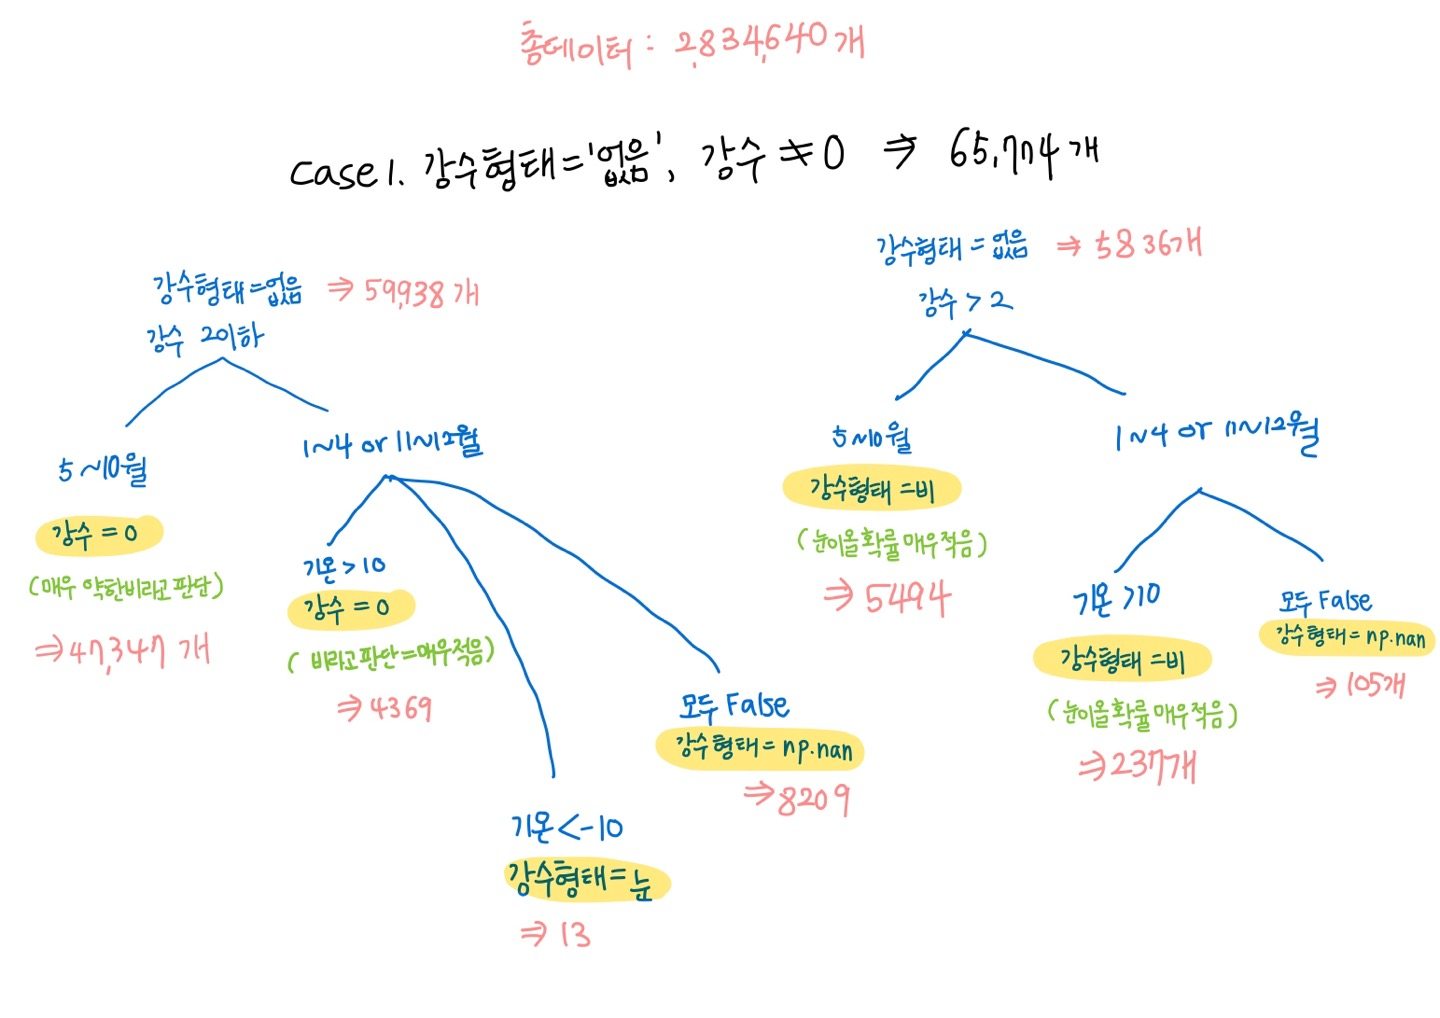

In [ ]:
df_final.isna().sum()

광역시도       0
시군구        0
날짜         0
시간대        0
배달건수       0
강수형태    3542
강수      3542
기온      3542
dtype: int64

In [ ]:
df_final = df_all.copy()
df_final['강수'] = np.where(df_final['강수형태'].isna(), np.nan, df_final['강수'])
df_final['기온'] = np.where(df_final['강수형태'].isna(), np.nan, df_final['기온'])

In [ ]:
 df_final.loc[np.where((df_final['강수형태'] == '없음') & (df_final['강수'] <= 2)  & ((df_final['날짜'].dt.month > 10) | (df_final['날짜'].dt.month < 5)) & (df_final['기온']<-10))]

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온
12424,강원도,강릉시,2020-12-30,16,0,없음,0.0,-10.2
12596,강원도,강릉시,2021-01-06,20,0,없음,0.0,-10.9
12597,강원도,강릉시,2021-01-06,21,0,없음,0.0,-12.0
12598,강원도,강릉시,2021-01-06,22,0,없음,0.0,-12.7
12599,강원도,강릉시,2021-01-06,23,0,없음,0.0,-12.1
...,...,...,...,...,...,...,...,...
2829954,충청북도,충주시,2021-02-17,18,0,없음,0.0,-10.4
2829955,충청북도,충주시,2021-02-17,19,0,없음,0.0,-10.6
2829956,충청북도,충주시,2021-02-17,20,0,없음,0.0,-10.8
2829957,충청북도,충주시,2021-02-17,21,0,없음,0.0,-10.8


In [ ]:
#47347 (ok)
df_final['강수'] = np.where((df_final['강수형태'] == '없음') & (df_final['강수'] > 0), 
                             np.where((df_final['강수'] <= 2) & (df_final['날짜'].dt.month <= 10) & (df_final['날짜'].dt.month >=5), 0 , df_final['강수']),         #강수형태=없음, 강수2이하, 5~10월 이면 0
                             df_final['강수']) 

#4369 (ok)                                
df_final['강수'] = np.where((df_final['강수형태'] == '없음') & (df_final['강수'] > 0),
                             np.where((df_final['강수'] <= 2) & ((df_final['날짜'].dt.month > 10) | (df_final['날짜'].dt.month < 5)) & (df_final['기온']>10),
                             0, df_final['강수']),
                             df_final['강수'])    
#13 (ok)
df_final['강수형태'] = np.where((df_final['강수형태'] == '없음') & (df_final['강수'] > 0) & ((df_final['날짜'].dt.month > 10) | (df_final['날짜'].dt.month < 5)) & (df_final['기온']<-10),
                                np.where(df_final['강수'] <=2, '눈',  df_final['강수형태']),
                                df_final['강수형태'])
#8209 (ok)
df_final['강수형태'] = np.where((df_final['강수형태'] == '없음') & (df_final['강수'] > 0) & ((df_final['날짜'].dt.month > 10) | (df_final['날짜'].dt.month < 5))  & (df_final['기온'] >= -10)  & (df_final['기온']<= 10),
                                np.where(df_final['강수'] <= 2, np.nan, df_final['강수형태']),
                                 df_final['강수형태'])
#237 (ok)                                
df_final['강수형태'] = np.where((df_final['강수형태'] == '없음') & (df_final['강수'] > 2),
                             np.where(((df_final['날짜'].dt.month > 10) | (df_final['날짜'].dt.month < 5)) & (df_final['기온']>10),
                            '비', df_final['강수형태']),
                             df_final['강수형태'])    
# 105 (ok)
df_final['강수형태'] = np.where((df_final['강수형태'] == '없음') & (df_final['강수'] > 2) & ((df_final['날짜'].dt.month > 10) | (df_final['날짜'].dt.month < 5)) & (df_final['기온']<=10),
                                np.nan,
                                df_final['강수형태'])
#5494 (ok)
df_final['강수형태'] = np.where((df_final['강수형태'] == '없음') & (df_final['강수'] > 2) & (df_final['날짜'].dt.month <= 10) & (df_final['날짜'].dt.month >=5),
                                '비',
                                 df_final['강수형태'])

In [ ]:
 df_final.isna().sum()

광역시도        0
시군구         0
날짜          0
시간대         0
배달건수        0
강수형태    11856
강수       3542
기온       3542
dtype: int64

In [ ]:
case1 = df_final[(df_final['강수형태']=='없음') & (df_final['강수'] > 0)]
case1

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온


모두 해결되었다!

## 3.3 강수형태 NaN인데 강수가 존재하는 경우

위에서 수정한 데이터로 인해 새롭게 강수형태가 NaN인 항목이 생성되었다. 따라서 강수형태에따라 날씨데이터를 다시 맞추어준다.

In [ ]:
df_final['강수'] = np.where(df_final['강수형태'].isna(), np.nan, df_final['강수'])
df_final['기온'] = np.where(df_final['강수형태'].isna(), np.nan, df_final['기온'])

In [ ]:
df_final.isna().sum()

광역시도        0
시군구         0
날짜          0
시간대         0
배달건수        0
강수형태    11856
강수      11856
기온      11856
dtype: int64

## 3.4 강수형태가 '없음'이 아닌데 강수가 0인경우(0개)

In [ ]:
case4= df_final[(df_final['강수형태'] != '없음') & (df_final['강수형태'] == 0)]
case4

,광역시도,시군구,날짜,시간대,배달건수,강수형태,강수,기온


In [ ]:
df_final.to_csv('/content/drive/MyDrive/시군구_시간대별_날씨_평균배달.csv',index=False, encoding="utf-8-sig")